In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import warnings
warnings.simplefilter("ignore")

In [2]:
df2=pd.read_csv("C:/Users/Dheeraj/Untitled Folder/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df1=pd.read_csv("C:/Users/Dheeraj/Untitled Folder/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df4=pd.read_csv("C:/Users/Dheeraj/Untitled Folder/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv("C:/Users/Dheeraj/Untitled Folder/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
df3=pd.read_csv("C:/Users/Dheeraj/Untitled Folder/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")

In [3]:
df5

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
177567,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,67 years 03 months,1080000.0
177568,2024-04,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,63 years 03 months,780888.0
177569,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,63 years 04 months,830000.0
177570,2024-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,63 years 04 months,880000.0


In [4]:
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')

# Display the updated 'remaining_lease' column
print(df5['remaining_lease'])

0         61
1         60
2         62
3         62
4         62
          ..
177567    67
177568    63
177569    63
177570    63
177571    62
Name: remaining_lease, Length: 177572, dtype: int64


In [5]:
combine=pd.concat([df1,df2,df3,df4,df5],ignore_index=True)
combine

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
923770,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67.0
923771,2024-04,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,780888.0,63.0
923772,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.0
923773,2024-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,880000.0,63.0


In [6]:
combine[['year', 'month']] = combine['month'].str.split('-', expand=True)

# Convert 'year' and 'month' columns to numeric types if needed
combine['year'] = pd.to_numeric(combine['year'])
combine['month'] = pd.to_numeric(combine['month'])

In [7]:
combine

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
923770,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67.0,2024
923771,4,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,780888.0,63.0,2024
923772,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.0,2024
923773,4,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,880000.0,63.0,2024


In [8]:
combine['remaining_lease'].fillna(99 - (combine['year'] - combine['lease_commence_date']), inplace=True)

In [9]:
combine

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
923770,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67.0,2024
923771,4,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,780888.0,63.0,2024
923772,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63.0,2024
923773,4,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,880000.0,63.0,2024


In [10]:
combine['flat_model'] = combine['flat_model'].str.upper()

In [11]:
combine['flat_type'] = combine['flat_type'].str.lower()

type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi-generation': 'multi generation'
}

combine['flat_type'] = combine['flat_type'].map(type_mapping)
# Changing the case to Uppercase
combine['flat_type'] = combine['flat_type'].str.upper()

In [12]:
combine

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
923770,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,APARTMENT,1992,1080000.0,67.0,2024
923771,4,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,APARTMENT,1988,780888.0,63.0,2024
923772,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,830000.0,63.0,2024
923773,4,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,880000.0,63.0,2024


In [13]:
mask = combine['remaining_lease']>99

# Use the boolean mask to drop rows
combine = combine[~mask]

In [14]:
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']

# Create a boolean mask to identify rows containing any of the specified values
mask = combine['storey_range'].isin(values_to_drop)

# Use the boolean mask to drop rows
combine = combine[~mask]

In [15]:
combine[['lower_bound', 'upper_bound']] = combine['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
combine['lower_bound'] = pd.to_numeric(combine['lower_bound'])
combine['upper_bound'] = pd.to_numeric(combine['upper_bound'])

In [16]:
# Adding a new column 'price_per_sqm'
combine['price_per_sqm'] = combine['resale_price'] / combine['floor_area_sqm']

# Adding a new column 'years_holding'
combine['years_holding'] = combine['year'] - combine['lease_commence_date']

# Adding a new column 'current_remaining_lease'
combine['current_remaining_lease'] = combine['remaining_lease'] - (2024 - combine['year'])

In [17]:
combine

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923770,4,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,APARTMENT,1992,1080000.0,67.0,2024,7,9,5966.850829,32,67.0
923771,4,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,APARTMENT,1988,780888.0,63.0,2024,7,9,5499.211268,36,63.0
923772,4,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,APARTMENT,1988,830000.0,63.0,2024,4,6,5684.931507,36,63.0
923773,4,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,880000.0,63.0,2024,4,6,6027.397260,36,63.0


In [18]:
combine = combine.reset_index(drop=True)
combine.to_csv('Singapore.csv', index=False)
# Reading the dataset
df = pd.read_csv('Singapore.csv')

In [142]:
df.isnull().sum() 

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
year                       0
lower_bound                0
upper_bound                0
price_per_sqm              0
years_holding              0
current_remaining_lease    0
dtype: int64

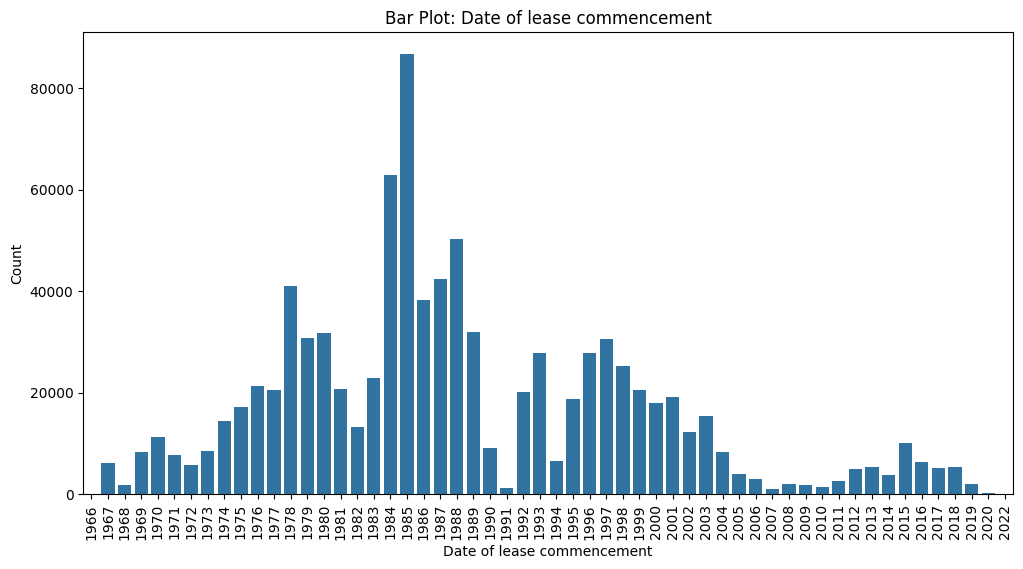

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df)
plt.title('Bar Plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

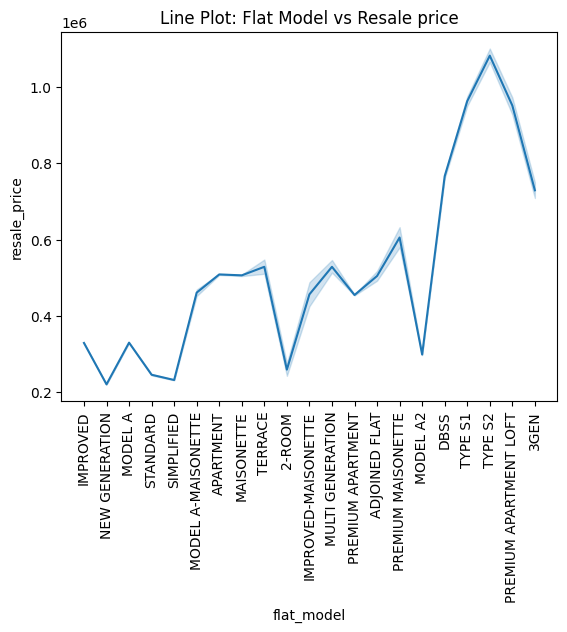

In [22]:
sns.lineplot(x='flat_model', y='resale_price', data=df)
plt.title('Line Plot: Flat Model vs Resale price')
plt.xticks(rotation=90)
plt.show()


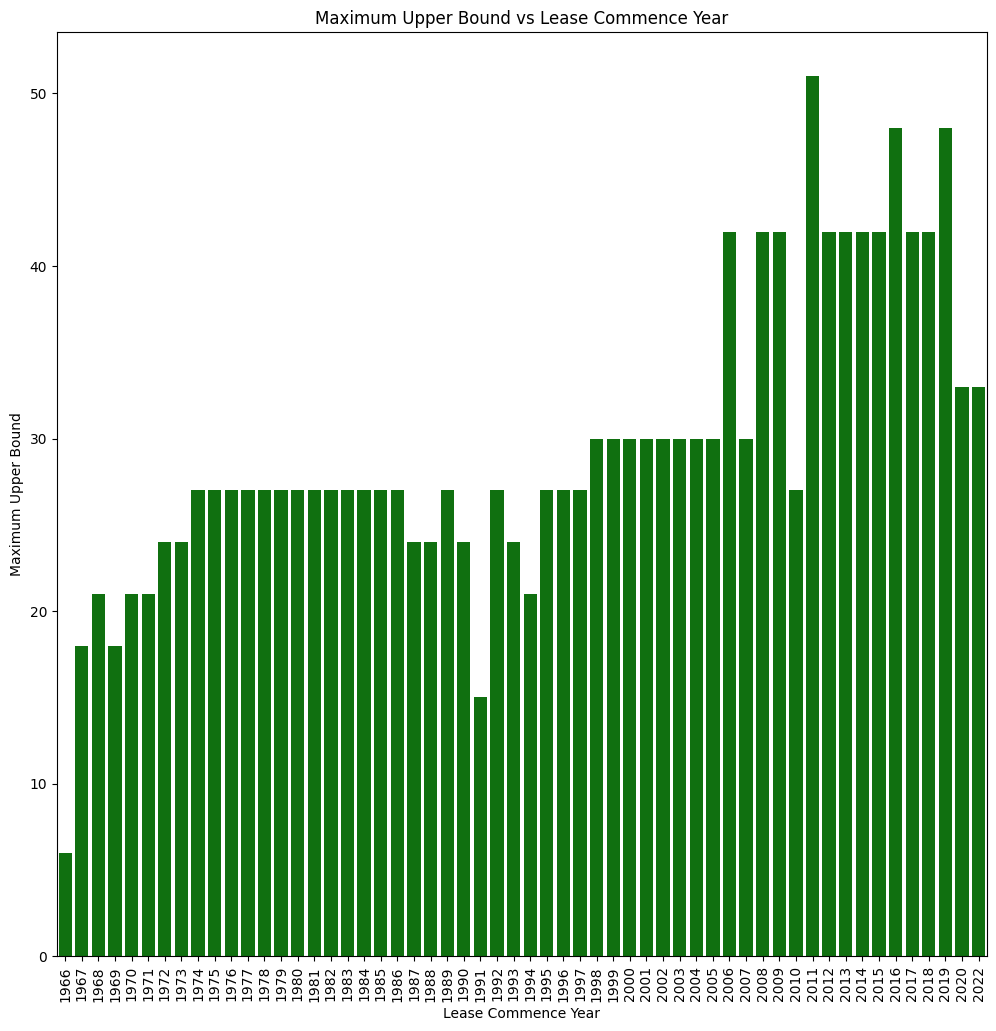

In [25]:
plt.figure(figsize=(12, 12))

# Group by lease_commence_year and find the maximum value of upper_bound for each group
max_upper_bound = df.groupby('lease_commence_date')['upper_bound'].max().reset_index()

# Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound, color='green')

# Set plot labels and title
plt.title('Maximum Upper Bound vs Lease Commence Year')
plt.xlabel('Lease Commence Year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [27]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year', 'lower_bound', 'upper_bound',
       'price_per_sqm', 'years_holding', 'current_remaining_lease'],
      dtype='object')

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [29]:
w=['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date','current_remaining_lease', 'years_holding', 'resale_price']
k=df[w]
X=k.drop('resale_price',axis=True)

Y=k['resale_price']
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['town']])
X_ohe = ohe.fit_transform(X[['town']]).toarray()  
ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['flat_type']])
X_ohe2 = ohe2.fit_transform(X[['flat_type']]).toarray()   
ohe3 = OneHotEncoder(handle_unknown='ignore')
ohe3.fit(X[['flat_model']])
X_ohe3 = ohe3.fit_transform(X[['flat_model']]).toarray()
ohe4 = OneHotEncoder(handle_unknown='ignore')
ohe4.fit(X[['storey_range']])
X_ohe4 = ohe4.fit_transform(X[['storey_range']]).toarray()
X = np.concatenate((X[['year', 'floor_area_sqm', 'lease_commence_date', 'current_remaining_lease', 'years_holding']].values, X_ohe,  X_ohe2,  X_ohe3,  X_ohe4 ), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)


print(X.shape())


In [30]:
k.isna().sum()

year                       0
town                       0
flat_type                  0
flat_model                 0
storey_range               0
floor_area_sqm             0
lease_commence_date        0
current_remaining_lease    0
years_holding              0
resale_price               0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(641820, 77)
(275066, 77)
(641820,)
(275066,)


In [32]:
Lr = LinearRegression()
Lr.fit(X_train, Y_train)
print(Lr.score(X_train, Y_train))
print(Lr.score(X_test,Y_test))

Y_pred = Lr.predict(X_test)

0.8389346760492161
0.8380395753379964


In [33]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

52109.830877624074
4644921163.706074
68153.6584763142
0.8380395753379964


In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 30,random_state = 42)
rf.fit(X_train, Y_train)

# Print R-squared scores
print( rf.score(X_train, Y_train))
print( rf.score(X_test, Y_test))


0.9903681594718319
0.9741669043617941


In [35]:
Y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

18742.02715756966
740876624.0540518
27219.048918984143
0.9741669043617941


In [36]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, Y_train)
print(DTR.score(X_train, Y_train))
print(DTR.score(X_test,Y_test))

Y_pred = DTR.predict(X_test)

0.9922575791885148
0.9653121463258115


In [37]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)
r2 = r2_score(Y_test, Y_pred)
print(mae)
print(mse)
print(rmse)
print(r2)

20955.389973024874
994825408.6825523
31540.85301133361
0.9653121463258115


In [38]:
#(X[['year','floor_area_sqm','lease_commence_date','years_holding','current_remaining_lease']].values, X1, X2, X3, X4)
new_sample = np.array([[1990, 50.0, 1966, 13, 50.0, 'ANG MO KIO', '1 ROOM', 'IMPROVED', '10 TO 12']])
new_sample_town = ohe.transform(new_sample[:, [5]]).toarray()
new_sample_flat_type = ohe2.transform(new_sample[:, [6]]).toarray()
new_sample_flat_model = ohe3.transform(new_sample[:, [7]]).toarray()
new_sample_storey_range = ohe4.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4]], new_sample_town, new_sample_flat_type,  new_sample_flat_model, new_sample_storey_range ), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = rf.predict(new_sample1)
print('Predicted selling price:',new_pred)

Predicted selling price: [18962.07222222]


In [41]:
import pickle
with open('model_rf.pkl','wb') as file:
    pickle.dump(DTR,file)
with open('scaler_rf.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('ohe.pkl','wb') as file:
    pickle.dump(ohe,file)
with open('ohe2.pkl','wb') as file:
    pickle.dump(ohe2,file)
with open('ohe3.pkl','wb') as file:
    pickle.dump(ohe3,file)
with open('ohe4.pkl','wb') as file:
    pickle.dump(ohe4,file)